In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
names = ['ID','UserID','first_name','last_name','email','gender','City','Country', 'Age', 'Profession','Architecture', 'Clothing', 'Food','Transport','MainCategory']
dataset = pd.read_csv("F:/Masters/Semester 3/Thesis/rekognition/backup_01July2019/dataset-final.csv", delimiter=",",names=names)
dataset.drop(dataset.columns[[0,1, 2, 3, 4, 5, 6, 7, 8, 9]], axis=1, inplace=True)
dataset = dataset.iloc[1:]


#names = ['ID','UserID','first_name','last_name','email','gender','City','Country', 'Age', 'Profession','Adventure','Architecture', 'Beach', 'Clothing', 'Food', 'Nature','MainCategory']
#dataset = pd.read_csv("F:/Masters/Semester 3/thesis/rekognition/dataset-final.csv", delimiter=",",names=names)
#dataset.drop(dataset.columns[[0,1, 2, 3, 4, 5, 6, 7, 8, 9]], axis=1, inplace=True)
#dataset = dataset.iloc[1:]


In [3]:
dataset.head()

,Architecture,Clothing,Food,Transport,MainCategory
1,1,1,0,3,2
2,2,0,0,3,2
3,5,0,0,0,0
4,1,0,1,3,2
5,4,0,0,1,0


In [4]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 4].values
#y = dataset.iloc[:, 6].values

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)  

In [6]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
y_pred = classifier.predict(X_test)  


In [9]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[9 0 0]
 [1 6 2]
 [0 0 7]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.67      0.80         9
           2       0.78      1.00      0.88         7

   micro avg       0.88      0.88      0.88        25
   macro avg       0.89      0.89      0.87        25
weighted avg       0.90      0.88      0.87        25



In [10]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

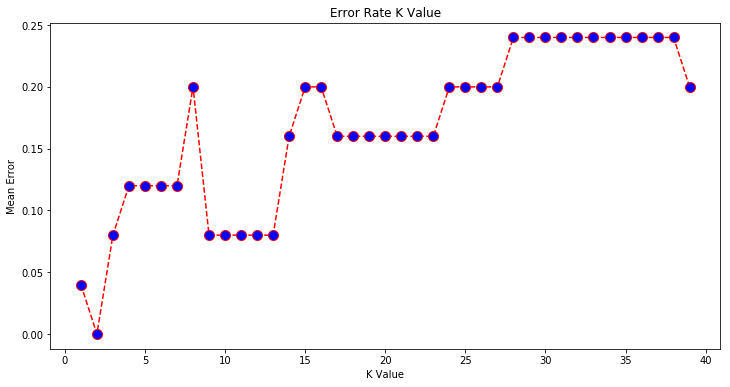

In [11]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  